## Observations and Insights

## Dependencies and starter code

In [122]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

In [149]:
# Combining both data sets into a single data set. Using Inner join - only interested in records that match 
#on both files

combined_data_df = pd.merge(mouse_metadata, study_results,how='inner', on='Mouse ID')
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [4]:
#Rename column name Tumor Volume (mm3) to just Tumor
combined_data_df = combined_data_df.rename(columns = {'Tumor Volume (mm3)' : 'Tumor'})
#Group Data
Tumor_Data_df = combined_data_df[['Drug Regimen','Tumor']]
Summary_Stats_df = Tumor_Data_df.groupby('Drug Regimen')
#Generate Summary Stats
Summary_Stats_Mean_df = Summary_Stats_df.mean().rename(columns = {'Tumor' : 'Mean'})
Summary_Stats_Median_df = Summary_Stats_df.median().rename(columns = {'Tumor' : 'Median'})
Summary_Stats_Var_df = Summary_Stats_df.var().rename(columns = {'Tumor' : 'Variance'})
Summary_Stats_StVar_df = Summary_Stats_df.std().rename(columns = {'Tumor' : 'StVar'})
Summary_Stats_SEM_df = Summary_Stats_df.sem().rename(columns = {'Tumor' : 'SEM'})
#Merge all datasets
combined_stats_df = pd.merge(Summary_Stats_Mean_df, Summary_Stats_Median_df, how="inner", on="Drug Regimen")
combined_stats_df = pd.merge(combined_stats_df, Summary_Stats_Var_df, how="inner", on="Drug Regimen")
combined_stats_df = pd.merge(combined_stats_df, Summary_Stats_StVar_df, how="inner", on="Drug Regimen")
Summary_Statistics_Table_df = pd.merge(combined_stats_df, Summary_Stats_SEM_df, how="inner", on="Drug Regimen")
Summary_Statistics_Table_df


,Mean,Median,Variance,StVar,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

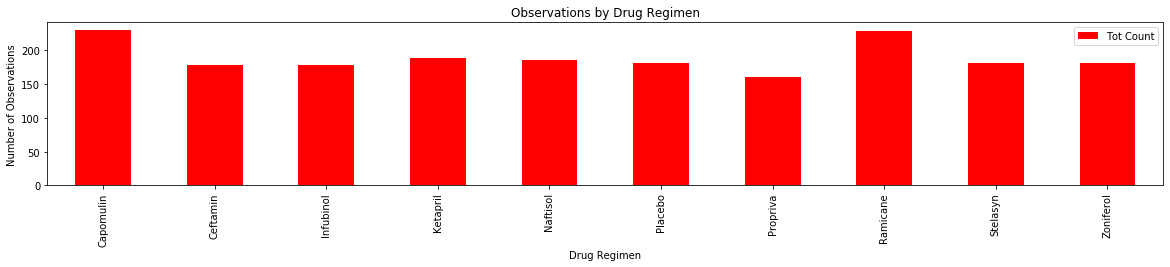

<Figure size 432x288 with 0 Axes>

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

cnt_by_regimen_df = combined_data_df.groupby('Drug Regimen').count()[['Mouse ID']]
cnt_by_regimen_df  = cnt_by_regimen_df .rename(columns = {'Mouse ID' : 'Tot Count'})


# Use DataFrame.plot() in order to create a bar chart of the data
cnt_by_regimen_df.plot(kind="bar", figsize=(20,3), color='red')

# Set a title for the chart
plt.title("Observations by Drug Regimen")
plt.ylabel("Number of Observations")

plt.show()
plt.tight_layout()

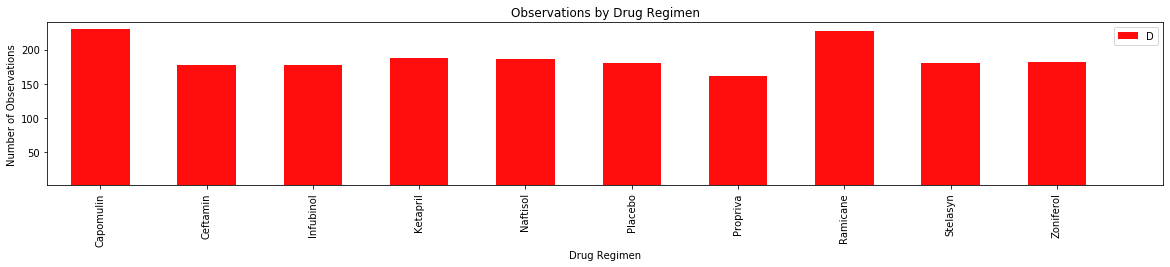

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Set x axis and tick locations

#Reset Index
cnt_by_regimen_df = cnt_by_regimen_df.reset_index() #This only works once may need to comment out if run wo clear

x_axis = np.arange(len(cnt_by_regimen_df))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

#np.arange(len(cnt_by_regimen_df))
#tick_locations = [value for value in x_axis]

plt.figure(figsize=(20,3))
plt.bar(x_axis, cnt_by_regimen_df["Tot Count"], width=0.55, color='r', alpha=0.95, align="center")
plt.xticks(tick_locations, cnt_by_regimen_df["Drug Regimen"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.5, len(x_axis))
plt.ylim(1, max(cnt_by_regimen_df["Tot Count"])+10)

# Set a Title and labels
plt.title("Observations by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observations")
plt.legend("Drug Regimen", loc=1);  #This is not working
plt.show()

## Pie plots

In [7]:
Cnt_by_Sex_df = combined_data_df.groupby('Sex').count()
#Reset Index
Cnt_by_Sex_df = Cnt_by_Sex_df.reset_index() #This only works once may need to comment out if run wo clear
Cnt_by_Sex_df

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor,Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


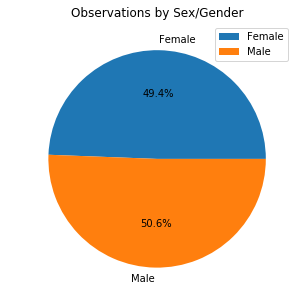

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Determine unique male female count by mouse ID
Cnt_by_Sex_df = combined_data_df.groupby('Sex').count()

# Use DataFrame.plot() in order to create a bar chart of the data
c2  = Cnt_by_Sex_df.plot.pie(y='Mouse ID', figsize=(5, 5
                                                
                                                   ),autopct='%1.1f%%', 
                           #labels=Cnt_by_Sex_df['Sex'],
                             title="Observations by Sex/Gender")  
c2.set_ylabel(' ');


/Users/ashwinpatel/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  # Remove the CWD from sys.path while we load stuff.


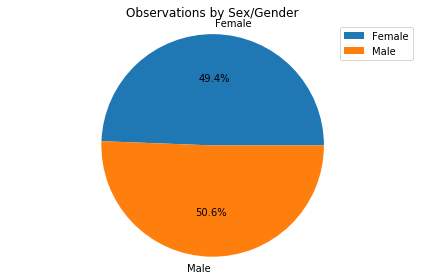

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Cnt_by_Sex_df = combined_data_df.groupby('Sex').count()
#Reset Index
Cnt_by_Sex_df = Cnt_by_Sex_df.reset_index()
plt.close
patches = plt.pie(Cnt_by_Sex_df['Mouse ID'],labels=Cnt_by_Sex_df['Sex'],autopct='%1.1f%%'
        
       )
plt.title("Observations by Sex/Gender")
plt.legend(patches, labels=Cnt_by_Sex_df['Sex'], loc="best");
plt.axis('equal')
plt.tight_layout()
plt.show()




## Quartiles, outliers and boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [124]:
combined_data_df = combined_data_df.rename(columns = {'Tumor' : 'Tumor Volume'})
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [125]:
#Rename column name Tumor Volume (mm3) to just Tumor
combined_data_df = combined_data_df.rename(columns = {'Tumor Volume (mm3)' : 'Tumor Volume'})
#Grab just the columns we need to work with
Tumor_Data_df = combined_data_df[['Mouse ID','Timepoint', 'Drug Regimen', 'Tumor Volume']]
#Grab top 4 Drug Regimens and reset the index, use the dataframe we created at beginning
Top_4_Regimen_df = cnt_by_regimen_df.nlargest(4, ['Tot Count'])
Top_4_Regimen_df = Top_4_Regimen_df.reset_index()
#From Tumour_Data_df extract all rows that have the top 4 regimen, using a Merge an Inner Join
Top_4_Regimen_df = pd.merge(Tumor_Data_df,Top_4_Regimen_df , on = ['Drug Regimen'], how='inner')
#Get the mouseid's with the max value in timepoint.
Max_Timepoint_df = combined_data_df.groupby('Mouse ID')[['Timepoint']].max()
#Reset Index (So we can merge this dataset to get correct tumor value)
Max_Timepoint_df = Max_Timepoint_df.reset_index()
#Merge both data sets to create one master dataset
Max_Timepoint_df = pd.merge(Top_4_Regimen_df,Max_Timepoint_df, on = ['Mouse ID','Timepoint'])
#Create final dataset
Final_Data_df = Max_Timepoint_df [['Mouse ID','Timepoint', 'Drug Regimen', 'Tumor Volume']]
Final_Data_df
#IQR is the middle 50th percentile so it would be 75th - 25th percentile.
#How do we achieve this?
Q1 = Final_Data_df.quantile(0.25)
Q3 = Final_Data_df.quantile(0.75)

IQR = Q3 - Q1
print(Final_Data_df)
print(IQR)


   Mouse ID  Timepoint Drug Regimen  Tumor Volume
0      k403         45     Ramicane     22.050126
1      g791         45     Ramicane     29.128472
2      s508         45     Ramicane     30.276232
3      m546         45     Ramicane     30.564625
4      z578         45     Ramicane     30.638696
..      ...        ...          ...           ...
95     x930         25     Naftisol     53.726101
96     y601          5     Naftisol     48.475003
97     z234          5     Naftisol     46.129357
98     z795         45     Naftisol     65.741070
99     z969         45     Naftisol     73.867845

[100 rows x 4 columns]
Timepoint       11.250000
Tumor Volume    26.069226
dtype: float64


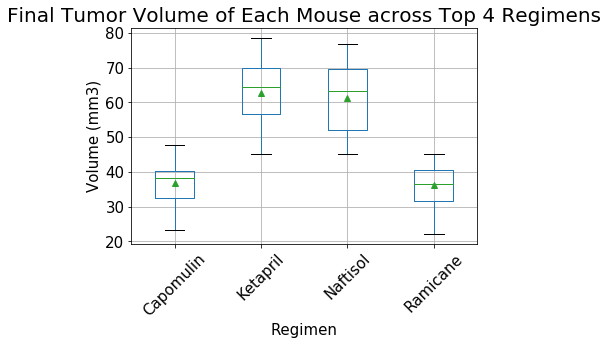

In [127]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
ax = Final_Data_Tumor_df.boxplot(column='Tumor Volume', by='Drug Regimen', rot=45, fontsize=15, layout=None
                                ,showfliers=True,showmeans=True)
# get rid of the automatic title and some addtional titles
plt.suptitle("")
plt.suptitle("")
ax.set_xlabel("Regimen", fontsize=15)
ax.set_ylabel("Volume (mm3)", fontsize=15)
ax.set_title("Boxplot of V1")
ax.set_title("Final Tumor Volume of Each Mouse across Top 4 Regimens",fontsize=20);

#plt = Final_Data_Tumor_df.boxplot(column='Tumor Volume', by='Drug Regimen', rot=45, fontsize=15, layout=None)
#plt.set_title('Final Tumor Volumnw by Regimen')


## Line and scatter plots

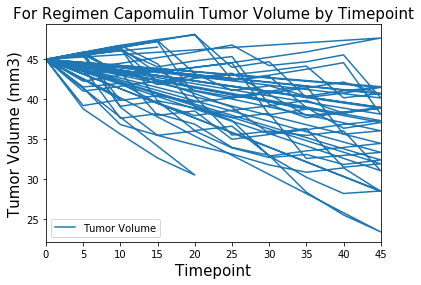

In [147]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#1 Step 1 just grab data for Capomulin, need timeplot, tumor volume and regimen
# from combined data set rename tumor volume column
combined_data_df = combined_data_df.rename(columns = {'Tumor Volume (mm3)' : 'Tumor Volume'})
# From combined dataframe extraxt all Capomulin records
combined_data_cap_df = combined_data_df.loc[combined_data_df['Drug Regimen'] == 'Capomulin']
# Now take only the columns we need
combined_data_cap_df = combined_data_cap_df[['Mouse ID','Timepoint','Tumor Volume']]
# Now we can do a line plot
# gca stands for 'get current axis'
ax = plt.gca()

combined_data_cap_df.plot(kind='line',x='Timepoint',y='Tumor Volume',ax=ax)
plt.title('For Regimen Capomulin Tumor Volume by Timepoint', fontsize=15)
plt.xlabel("Timepoint",fontsize=15)
plt.ylabel("Tumor Volume (mm3)", fontsize=15)
plt.show()


In [153]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#1 Step 1 just grab data for Capomulin, need timeplot, tumor volume and regimen
# from combined data set rename tumor volume column
combined_data_df = combined_data_df.rename(columns = {'Tumor Volume (mm3)' : 'Tumor Volume'})
combined_data_df = combined_data_df.rename(columns = {'Weight (g)' : 'Weight'})
# From combined dataframe extraxt all Capomulin records
combined_data_cap_scat_df = combined_data_df.loc[combined_data_df['Drug Regimen'] == 'Capomulin']
# Now take only the columns we need
combined_data_cap_scat_df = combined_data_cap_scat_df[['Weight','Tumor Volume']]
combined_data_cap_scat_df.head()
# Now we can do a line plot
# gca stands for 'get current axis'




,Weight,Tumor Volume
10,17,45.000000
11,17,43.878496
12,17,37.614948
13,17,38.177232
14,17,36.866876


In [16]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen